In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_excel('cleantdata.xlsx')
df.dtypes

flightid                    int64
callsign                   object
Origin                     object
Destination                object
OBT                        object
Date               datetime64[ns]
TOT                        object
Arrivaltime                object
RFL                         int64
Airline                    object
aircrafttype               object
WVC                        object
routelength               float64
cost                      float64
routelabel                  int64
aircraftlabel               int64
Airlinelabel                int64
arrivaldatetime    datetime64[ns]
arrivaltime_hr              int64
dtype: object

In [3]:
X=np.c_[df.Airlinelabel,df.aircraftlabel,df.arrivaltime_hr]
y=df.routelabel
class_names=['route1','route2','route3','route4','route5']
#^ only suitable for this particular data set because k means cluster was identified as 5 distinct routes

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=9)

In [5]:
#assess the accuracy for for diferent learning rate using gradient boosting classifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.5f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.5f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.86538
Accuracy score (validation): 0.77358

Learning rate:  0.1
Accuracy score (training): 0.86538
Accuracy score (validation): 0.77358

Learning rate:  0.25
Accuracy score (training): 0.90385
Accuracy score (validation): 0.77358

Learning rate:  0.5
Accuracy score (training): 0.90385
Accuracy score (validation): 0.77358

Learning rate:  0.75
Accuracy score (training): 0.90385
Accuracy score (validation): 0.73585

Learning rate:  1
Accuracy score (training): 0.90385
Accuracy score (validation): 0.73585



In [6]:
def plot_confusion_matrix(y_true ,y_pred , classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    

    """
    cm=confusion_matrix(y_true,y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print()
    
    print("Classification Report")
    print(classification_report(y_true,y_pred))
    print()
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [7]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_test, y_test)
y_pred = gb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)


Confusion matrix, without normalization
[[ 1  2  0  0  0]
 [ 0 30  0  0  0]
 [ 0  0  6  0  0]
 [ 0  3  2  4  0]
 [ 0  0  0  0  5]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.86      1.00      0.92        30
          2       0.75      1.00      0.86         6
          3       1.00      0.44      0.62         9
          4       1.00      1.00      1.00         5

avg / total       0.89      0.87      0.85        53




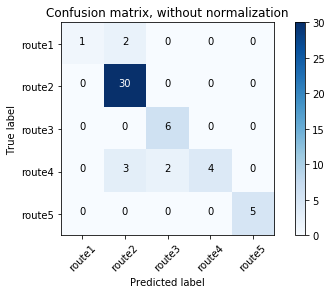

In [8]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.33333333 0.66666667 0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.33333333 0.22222222 0.44444444 0.        ]
 [0.         0.         0.         0.         1.        ]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.86      1.00      0.92        30
          2       0.75      1.00      0.86         6
          3       1.00      0.44      0.62         9
          4       1.00      1.00      1.00         5

avg / total       0.89      0.87      0.85        53




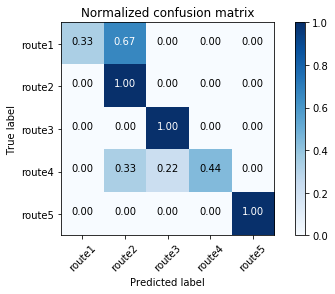

In [9]:
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
